## Packages

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## Resources
General: 
- Hands on Machine Learning with scikit-learn and tensorflow, chapter 5, 6, 7

- Machine Learnia : https://www.youtube.com/watch?v=w_bLGK4Pteo


Decision Trees: 
- https://scikit-learn.org/stable/modules/tree.html
- https://www.lovelyanalytics.com/2016/08/16/decision-tree-comment-ca-marche/
- https://www.youtube.com/watch?v=ZVR2Way4nwQ
- https://www.youtube.com/watch?v=sgQAhG5Q7iY

Random Forests:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- https://www.youtube.com/watch?v=v6VJ2RO66Ag

SVM: 
- https://scikit-learn.org/stable/modules/svm.html
- https://towardsdatascience.com/a-brief-introduction-to-support-vector-machine-adf0f103a80f
- https://www.youtube.com/watch?v=_YPScrckx28
- https://www.youtube.com/watch?v=Q7vT0--5VII

Learning Curves: 
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
- https://towardsdatascience.com/why-you-should-be-plotting-learning-curves-in-your-next-machine-learning-project-221bae60c53

Validation Curves 
- https://scikit-learn.org/stable/modules/learning_curve.html

- Take some time to read book sections for decision tree, random forest and SVM algorithms.
- Import these algorithms from scikit-learn and find the hyperparameter options that are available when they are instantiated.


## Decision trees

Explain here how they work in your own words:

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree

In [20]:
# Load dataset
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [104]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [22]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
print(len(X))
print(len(y))

150
150


In [80]:
# Train a decision tree with max_depth=2

## The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure 
## or until all leaves contain less than min_samples_split samples.

clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [73]:
iris.feature_names[2:]

['petal length (cm)', 'petal width (cm)']

### Visualization: export_graphviz

In [74]:
# Visualize decision tree using graphviz 
tree.export_graphviz(
    clf,
    out_file='iris_tree.dot',
    feature_names=iris.feature_names[2:], #à partir da segunda linha, pegar todas as colunas.
    class_names=iris.target_names,
    rounded=True,
    filled=True #caso tenha valor zer à esquerda
)

In [75]:
#converting .dot into .png
!dot -Tpng iris_tree.dot -o iris_tree.png

In [76]:
# open image with PIL
from PIL import Image
image = Image.open("iris_tree.png")
image.show()

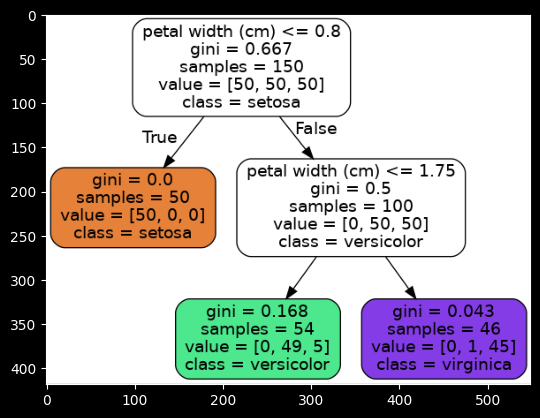

In [77]:
# open image with matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('iris_tree.png')
imgplot = plt.imshow(img)
plt.imshow(img)

### Visualization: plot_tree

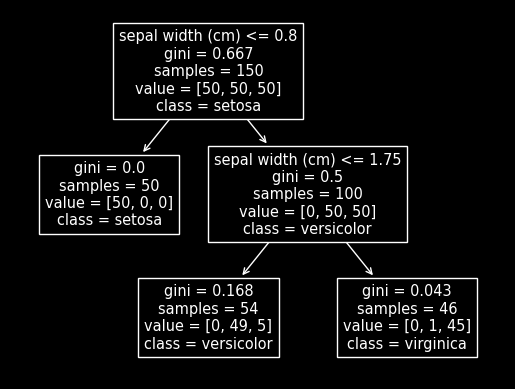

In [78]:
# visualize using the 'plot_tree' method (from the sklearn.tree module)
from sklearn.tree import plot_tree

plot = plot_tree(clf, feature_names = iris.feature_names[:2], class_names = iris.target_names)

Compute the predictions of a decision tree classifier on a test set and calculate all the classification metrics you know:


In [82]:
# split in train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [126]:
# fit classifier with max_depth=2

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [127]:
# make predictions on the test set
y_pred_clf = clf.predict(X_test)

In [129]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Print Accuracy
print(f"Accuracy metrics: {accuracy_score(y_test, y_pred_clf)}")
# Print Precision
print(f"Precision Score: {precision_score(y_test, y_pred_clf, average='micro')}")
# Print Recall
print(f"Recall: {recall_score(y_test, y_pred_clf, average='micro')}")
# Print F1-score
print(f"F1 Score: {f1_score(y_test, y_pred_clf, average='micro')}")
# Print Confusion matrix
print(f"Confusion matrix:\n {confusion_matrix(y_test, y_pred_clf)}")

Accuracy metrics: 0.9736842105263158
Precision Score: 0.9736842105263158
Recall: 0.9736842105263158
F1 Score: 0.9736842105263158
Confusion matrix:
 [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


## Random forests

Explain here how they work in your own words:

In [130]:
# fit a Random Forest classifier 
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier()

In [131]:
# make predictions on the test set

y_pred_rf = rf.predict(X_test)

In [132]:
# Print Accuracy
print(f"Accuracy metrics: {accuracy_score(y_test, y_pred_rf)}")
# Print Precision
print(f"Precision Score: {precision_score(y_test, y_pred_rf, average='micro')}")
# Print Recall
print(f"Recall: {recall_score(y_test, y_pred_rf, average='micro')}")
# Print F1-score
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='micro')}")
# Print Confusion matrix
print(f"Confusion matrix:\n {confusion_matrix(y_test, y_pred_rf)}")

Accuracy metrics: 1.0
Precision Score: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


## SVM

Explain here how they work in your own words:

In [6]:
# Book example SVM: iris dataset


In [163]:
# fit a linear SVM classifier

from sklearn.svm import SVC

svc = SVC(kernel = 'linear', random_state = 42)

svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [164]:
# make predictions on the test set
y_pred_svc = svc.predict(X_test)

In [166]:
# Print Accuracy
print(f"Accuracy metrics: {accuracy_score(y_test, y_pred_svc)}")
# Print Precision
print(f"Precision Score: {precision_score(y_test, y_pred_svc, average='micro')}")
# Print Recall
print(f"Recall: {recall_score(y_test, y_pred_svc, average='micro')}")
# Print F1-score
print(f"F1 Score: {f1_score(y_test, y_pred_svc, average='micro')}")
# Print Confusion matrix
print(f"Confusion matrix:\n {confusion_matrix(y_test, y_pred_svc)}")

Accuracy metrics: 1.0
Precision Score: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


## Learning curves

### Book example

In [143]:
# Book Dataset (pdf pp.129)

#transform our training data, adding the square (second-degree polynomial) 
  #of each feature in the training set as a new feature.

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

print(X_train[0])
print(X_poly[0])


[1.4 0.2]
[1.4  0.2  1.96 0.28 0.04]


In [148]:
from sklearn.linear_modeX_trainl import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
lin_reg.intercept_, lin_reg.coef_

(-0.28812407340548885,
 array([-0.01952737,  0.93618296,  0.0964744 , -0.41122903,  0.48064883]))

/home/marcos.centurion@Digital-Grenoble.local/anaconda3/envs/stat3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1776: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 111 instead of 112.
  warnings.warn(


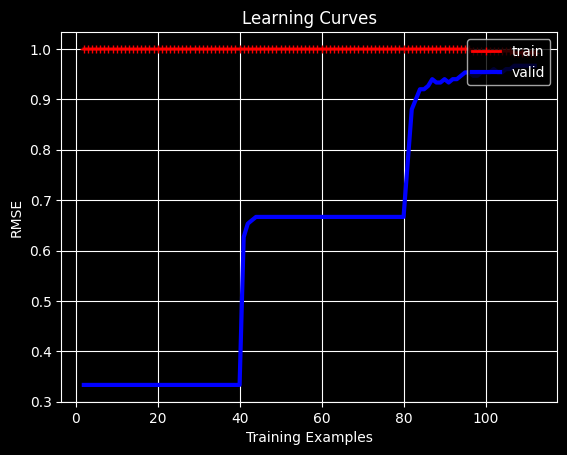

In [170]:
# Implement the book’s code on learning curves on the data he has used.

from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    RandomForestClassifier(), X, y, train_sizes=np.linspace(2, len(X_train), len(X_train), dtype='int'), cv=5,
    )

train_errors = train_scores.mean(axis=1)
valid_errors = valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.title("Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()


/home/marcos.centurion@Digital-Grenoble.local/anaconda3/envs/stat3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1776: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 111 instead of 112.
  warnings.warn(


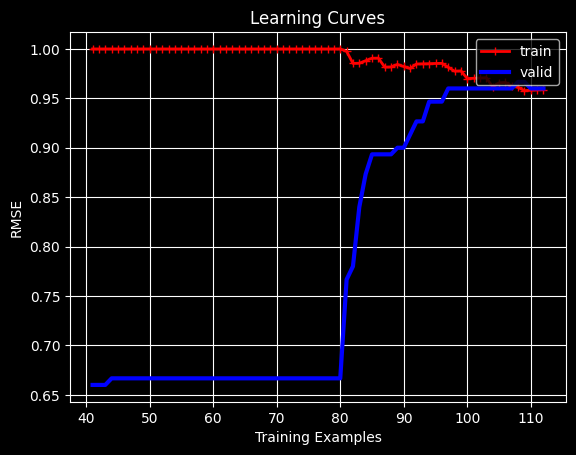

In [171]:
train_sizes, train_scores, valid_scores = learning_curve(
    SVC(kernel = 'linear', random_state = 42), X, y, train_sizes=np.linspace(2, len(X_train), len(X_train), dtype='int'), cv=5,
    )

train_errors = train_scores.mean(axis=1)
valid_errors = valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.title("Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()


Change the method so that instead of having an incremental training set size going from 1 to the size of X_train, you have a fixed set of training sizes.
For example: 

training_set_sizes = np.linspace(2, len(X_train), len(X_train), dtype='int')

or 

training_set_sizes = [1, 10, 20, 30, 40, 50, 60, 70, 80]

In [83]:
# Method that plots learning curves for a given estimator and training_set_sizes
def your_method_name_for_plotting_learning_curves():
   pass

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

## Learning curves for classifiers

Implement a ML problem on a dataset you have already seen in the course. 

Produce a plot of a model which shows signs of underfitting, and one that shows signs of overfitting.

In [11]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
# create your method to plot your learning curves using the sklearn method learning_curve()
    

## Decision trees learning curves

In [ ]:
# import the dataset you want

In [ ]:
# do all the pre-rpocessing that is needed

In [ ]:
# Underfit model
# Train a decision tree with max_depth=2

In [ ]:
# Overfit model
# Train a decision tree with max_depth=10

## Random forests classifier learning curves

In [13]:
# Underfit model

In [12]:
# Overfit model

## SVM

SVM Advantages:

- SVM’s are very good when we have no idea on the data.
- Works well with even unstructured and semi structured data like text, Images and trees.
- The kernel trick is real strength of SVM. With an appropriate kernel function, we can solve any complex problem.
- Unlike in neural networks, SVM is not solved for local optima.
- It scales relatively well to high dimensional data.
- SVM models have good generalization in practice, the risk of over-fitting is less in SVM.

SVM Disadvantages:

- Choosing a “good” kernel function is not easy.
- Long training time for large datasets.
- Difficult to understand and interpret the final model, variable weights and individual impact.
- The SVM hyper parameters are Cost -C and gamma. It is not that easy to fine-tune these hyper-parameters. It is hard to visualize their impact

In [11]:
# Underfit model?


In [10]:
# Overfit model?


## Validation curves

Validation curves are a useful tool for improving the performance of a model by addressing issues such as overfitting or underfitting. Validation curves are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we vary the values of the model parameters. They are complementaru of GridSearch and make for a very nice visual tool for ypur algorithm optimization. 


In [39]:
from sklearn.model_selection import validation_curve
def plot_validation_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, param_range=None, paran_name=None):

    # create your method to plot your learning curves using the sklearn method validation_curve()
    pass

Plot the validation curves for a chosen algorithm and vary 1 or 2 parameters of your choice.

Do a GridSearch and see if the most optimal parameter is coherent with what you see on your validation curves